# Project: Real estate analysis (Buenos Aires city)

## Attributes


* **id**
* **created_on**
* **operation**
* **property_type**
* **place_with_parent_names**
* **lat-lon**
* **lat**
* **lon**
* **price**
* **currency**
* **price_aprox_usd**
* **surface_total_in_m2**
* **surface_covered_in_m2**
* **price_usd_per_m2**
* **floor**
* **rooms**
* **expenses**
* **barrio**
* **properati_url**

## Importing Python libraries

In order to work on cleaning the data and visualizing our dataset, I am going to use the numpy, pandas, matplotlib.pylab and seaborn libraries.


In [2]:
# Importing Python libraries
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import openpyxl as op

In [3]:
# To see graphs inside the notebook
%matplotlib inline
# graphs size
plt.rcParams['figure.figsize'] = (12,8)
# columns size
pd.set_option('max_columns', 120)
pd.set_option('max_colwidth', 5000)


## Reading dataset

In [4]:
# Loading dataset

df = pd.read_csv('dataset\datos_properati.csv', parse_dates = ['created_on'])

## Data exploration

In [5]:
# To see how many attributes and instances
df.shape

(18979, 17)

In [6]:
df.head(3)

,created_on,operation,property_type,place_with_parent_names,lat-lon,lat,lon,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,floor,rooms,expenses,properati_url,barrio,comuna
0,2017-09-22,sell,house,|Argentina|Capital Federal|Palermo|Palermo Viejo|,"-34.5889531469,-58.4298817776",-34.588953,-58.429882,2000000.0,312.0,NaN,6410.25641,NaN,NaN,NaN,https://www.properati.com.ar/2os_venta_casa_palermo-viejo_rent-ba,PALERMO,14.0
1,2017-08-01,sell,store,|Argentina|Capital Federal|Palermo|,"-34.586069,-58.414431",-34.586069,-58.414431,790000.0,121.0,121.0,6528.92562,NaN,NaN,NaN,https://www.properati.com.ar/1cl7l_venta_local_palermo_santa-fe-av-al-3500_sotano_garage_subte-linea-d_deptos-temporarios,PALERMO,14.0
2,2017-08-02,sell,store,|Argentina|Capital Federal|Palermo|Palermo Soho|,"-34.589723,-58.4325664",-34.589723,-58.432566,343000.0,122.0,108.0,2811.47541,NaN,2.0,NaN,https://www.properati.com.ar/1cm8w_venta_local_palermo-soho_cabrera-jose-a-_5000_jardin_lavadero_patio_piscina_toilette_garage_ojo-propiedades,PALERMO,14.0


## Property category

In [7]:
# to show different property_type

property_type=df['property_type']
property_type.value_counts()

apartment    14807
house         1618
PH            1463
store         1091
Name: property_type, dtype: int64

### Category filter

I'll work only with house, apartment and PH.

In [8]:
# Dataframe filtered without store
df_filtered = df[df.property_type !='store']

df_filtered

,created_on,operation,property_type,place_with_parent_names,lat-lon,lat,lon,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,floor,rooms,expenses,properati_url,barrio,comuna
0,2017-09-22,sell,house,|Argentina|Capital Federal|Palermo|Palermo Viejo|,"-34.5889531469,-58.4298817776",-34.588953,-58.429882,2000000.00,312.0,NaN,6410.256410,NaN,NaN,NaN,https://www.properati.com.ar/2os_venta_casa_palermo-viejo_rent-ba,PALERMO,14.0
18,2017-08-29,sell,apartment,|Argentina|Capital Federal|Palermo|,"-34.588912403,-58.4134942185",-34.588912,-58.413494,340000.00,130.0,120.0,2615.384615,NaN,4.0,8000.0,https://www.properati.com.ar/1dzv6_venta_departamento_palermo_guemes_3600_balcon_suite_jardin_lavadero_luminoso_lujoso_dependencias_placard_doble-circulacion_subte-linea-d_luisio-propiedades-suc-virrey-del-pino-2378,PALERMO,14.0
19,2017-08-29,sell,apartment,|Argentina|Capital Federal|Palermo|,"-34.5770327,-58.4233675",-34.577033,-58.423368,222000.00,52.0,48.0,4269.230769,NaN,1.0,NaN,https://www.properati.com.ar/1e05k_venta_departamento_palermo_juncal-al-4500_gimnasio_jardin_lavadero_parrilla_piscina_sum_aire-acondicionado_subte-linea-h_subte-linea-c_deptos-temporarios,PALERMO,14.0
20,2017-08-29,sell,apartment,|Argentina|Capital Federal|Palermo|,"-34.5950139,-58.4273915",-34.595014,-58.427392,180000.00,70.0,70.0,2571.428571,NaN,NaN,3000.0,https://www.properati.com.ar/1e0mq_venta_departamento_palermo_julian-alvarez-al-1200_lavadero_amoblado_sanchez-carrizo-real-estate,PALERMO,14.0
22,2017-08-30,sell,house,|Argentina|Capital Federal|Palermo|Palermo Hollywood|,"-34.5793535,-58.4364489",-34.579354,-58.436449,1200000.00,532.0,334.0,2255.639098,NaN,6.0,NaN,https://www.properati.com.ar/1e1ve_venta_casa_palermo-hollywood_jardin_lavadero_piscina_luminoso_vista_garage_nexo-propiedades_h0z,PALERMO,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18973,2017-12-17,sell,apartment,|Argentina|Capital Federal|Villa Soldati|,"-34.66897,-58.443897",-34.668970,-58.443897,49000.00,75.0,75.0,653.333333,NaN,4.0,NaN,https://www.properati.com.ar/1j22x_venta_departamento_villa-soldati_re-max-parque,VILLA SOLDATI,8.0
18974,2018-01-08,sell,apartment,|Argentina|Capital Federal|Villa Soldati|,"-34.668741,-58.443146",-34.668741,-58.443146,60000.00,55.0,55.0,1090.909091,NaN,3.0,NaN,https://www.properati.com.ar/1jcpm_venta_departamento_villa-soldati_roca-cnel-av-_3500_subte-premetro_re-max-parque,VILLA SOLDATI,8.0
18975,2018-01-23,sell,house,|Argentina|Capital Federal|Villa Soldati|,"-34.66417,-58.443317",-34.664170,-58.443317,99000.00,115.0,82.0,860.869565,NaN,3.0,NaN,https://www.properati.com.ar/1k1hs_venta_casa_villa-soldati_lavadero_parrilla_terraza_garage_placard_subte-premetro_re-max-acci-oacute-n,VILLA SOLDATI,8.0
18977,2018-01-27,sell,apartment,|Argentina|Capital Federal|Villa Soldati|,"-34.665005,-58.443041",-34.665005,-58.443041,50433.01,45.0,45.0,1120.733556,NaN,3.0,NaN,https://www.properati.com.ar/1k5v0_venta_departamento_villa-soldati_lavadero_subte-premetro_re-max-ayres,VILLA SOLDATI,8.0


### Data visualization with seaborn 

Text(0, 0.5, 'Quantity')

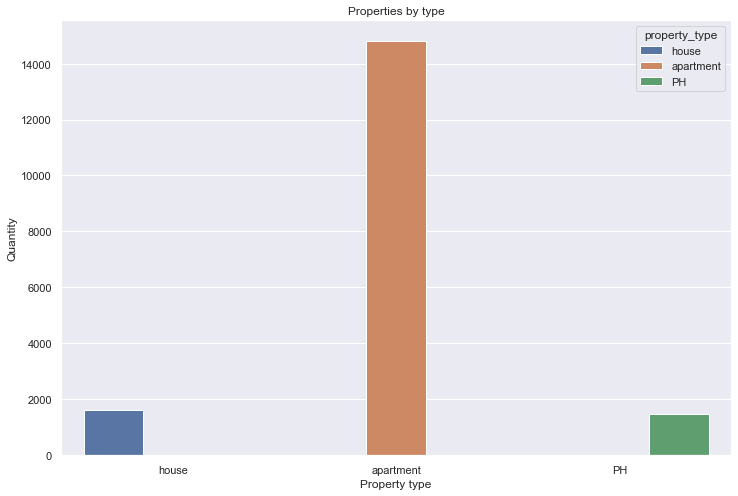

In [9]:
# Countplot for categories

sns.set(style="darkgrid")

cplt = sns.countplot(x="property_type", hue="property_type", data=df_filtered, linewidth=1 )
plt.title('Properties by type')
plt.xlabel('Property type')
plt.ylabel('Quantity')



## Null values

In [10]:
# Dropping na values 

a = df_filtered.dropna(subset=['surface_total_in_m2', 'surface_covered_in_m2', 'price_usd_per_m2', 'price_aprox_usd','rooms'])
a.shape

(11975, 17)

In [11]:
# Showing how many rows were dropped.



#price_aprox_usd =df_filtered['price_aprox_usd'].isna().sum()
#price_usd_per_m2 =df_filtered['price_usd_per_m2'].isna().sum()
#surface_total_in_m2 =df_filtered['surface_total_in_m2'].isna().sum()
#surface_covered_in_m2=df_filtered['surface_covered_in_m2'].isna().sum()
#rooms= df_filtered['rooms'].isna().sum()

#print(price_aprox_usd)
#print(price_usd_per_m2)
#print(surface_total_in_m2)
#print(surface_covered_in_m2)
#print(rooms)

df_filtered.shape[0]-a.shape[0] 



5913

In [12]:
# Other attributes with null values (They are no important for the analysis)
a.isna().sum()


created_on                     0
operation                      0
property_type                  0
place_with_parent_names        0
lat-lon                        0
lat                            0
lon                            0
price_aprox_usd                0
surface_total_in_m2            0
surface_covered_in_m2          0
price_usd_per_m2               0
floor                      10112
rooms                          0
expenses                    9703
properati_url                  0
barrio                         0
comuna                         0
dtype: int64

## Wrong data

Try to find possible mistakes in the dataset. For example, surface_total_in_m2 can not be bigger than surface_covered_in_m2.


In [13]:
# Showing this mistake
wrong_surface_rows = a[a['surface_total_in_m2'] < a['surface_covered_in_m2']]



In [14]:
wrong_surface_rows.shape

(73, 17)

Lets change their values to correct the mistake

In [15]:
a.at[wrong_surface_rows.index, 'surface_total_in_m2'] = wrong_surface_rows.surface_covered_in_m2
a.at[wrong_surface_rows.index, 'surface_covered_in_m2'] = wrong_surface_rows.surface_total_in_m2

C:\Users\61476\anaconda3\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [16]:
b= a['surface_total_in_m2'] < a['surface_covered_in_m2']
b.sum()

0

## Analyzing neighbourhoods

### Neighbourhoods with more apartments and houses
It is good to know which kind of properties are more common in the neghbourhoods because I can know if it is an affluent area, a residential area and so on.

In [34]:
total_property = a.groupby('barrio').property_type.count()

In [35]:
percentage_house_ph = a[a.property_type.isin(['PH', 'house'])].groupby('barrio').count().property_type/total_property
percentage_apartment = a[a.property_type == 'apartment'].groupby('barrio').count().property_type/total_property

In [36]:
print("Neighbourhoods with more apartments(%): \n", percentage_apartment.sort_values()[::-1][:5])
print("Neighbourhoods with more houses and ph(%): \n ", percentage_house_ph.sort_values()[::-1][:5])

Neighbourhoods with more apartments(%): 
 barrio
PUERTO MADERO    0.996154
RETIRO           0.992925
SAN NICOLAS      0.988827
RECOLETA         0.988362
BELGRANO         0.956316
Name: property_type, dtype: float64
Neighbourhoods with more houses and ph(%): 
  barrio
VERSALLES            0.622222
MATADEROS            0.612500
PARQUE AVELLANEDA    0.560606
VILLA RIACHUELO      0.555556
VILLA REAL           0.500000
Name: property_type, dtype: float64


<AxesSubplot:ylabel='property_type'>

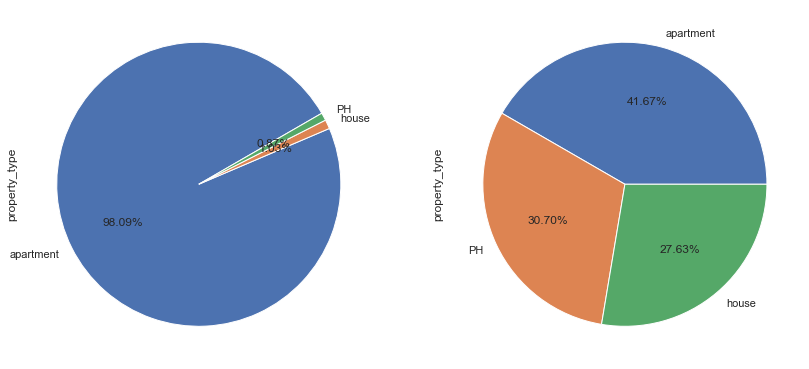

In [39]:
neighbourhoods_houses = percentage_house_ph.sort_values()[::-1][:5].index
neighbourhoods_apartments = percentage_apartment.sort_values()[::-1][:5].index
fig, axs = plt.subplots(1,2,figsize=(14,7))
a[a.barrio.isin(neighbourhoods_apartments)].property_type.value_counts().plot(x=None,y=None, kind='pie', startangle=30, ax=axs[0],autopct='%1.2f%%')
a[a.barrio.isin(neighbourhoods_houses)].property_type.value_counts().plot(x=None,y=None, kind='pie', ax=axs[1],autopct='%1.2f%%')

### Neighborhoods more expensive and cheaper

In [40]:
a['price_usd_per_m2'].describe() 

count     11975.000000
mean       2819.156920
std        1951.629155
min           0.958333
25%        2069.605943
50%        2611.700000
75%        3226.539589
max      142450.141026
Name: price_usd_per_m2, dtype: float64

In [42]:
# Showing quartiles

firstquartile = a["price_usd_per_m2"].quantile(0.25)
print(firstquartile)

thirdquartile = a["price_usd_per_m2"].quantile(0.75)
print(thirdquartile)

iqr = thirdquartile - firstquartile
print(iqr)


2069.605943152455
3226.5395894428157
1156.9336462903607


### Dropping extreme values

In [44]:
p10 = np.percentile(a.price_usd_per_m2, 10)
p90 = np.percentile(a.price_usd_per_m2, 90)
a = a[(a.price_usd_per_m2 >= p10) & (a.price_usd_per_m2 <= p90)]

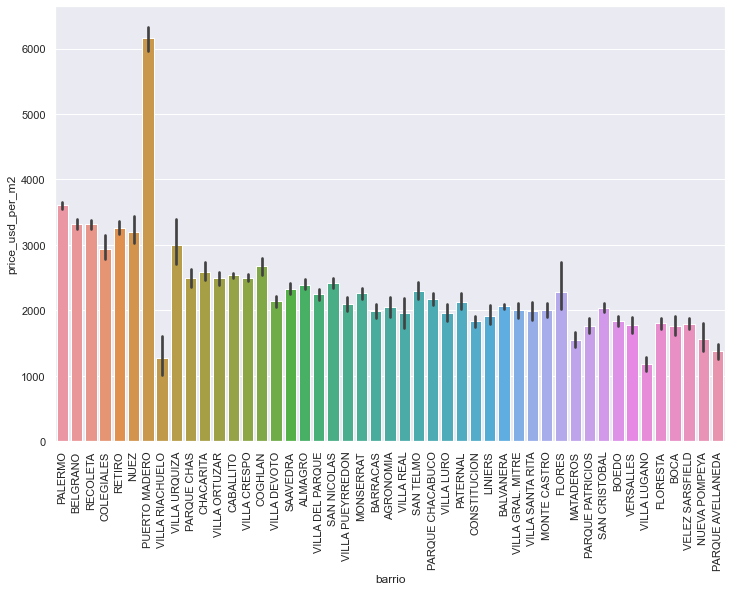

In [45]:
#Showing most expensive neighbourhoods
plt.xticks(rotation = 90)
barrios = a.groupby('barrio').mean().sort_values('price_usd_per_m2', ascending=False).index
sns.barplot(x="barrio", y="price_usd_per_m2", order=barrios, data=df_filtered);

#### Most expensive

In [46]:
table = pd.pivot_table(df, values='price_usd_per_m2', index=['barrio'], aggfunc=np.mean)
most_expensive = table.sort_values('price_usd_per_m2', ascending=False).iloc[:5]
most_expensive

,price_usd_per_m2
barrio,
PUERTO MADERO,6156.633183
PALERMO,3632.057960
RETIRO,3417.635657
RECOLETA,3346.748987
BELGRANO,3338.725206


#### Cheapest

In [47]:
table = pd.pivot_table(df, values='price_usd_per_m2', index=['barrio'], aggfunc=np.mean)
cheapest = table.sort_values('price_usd_per_m2', ascending=True).iloc[:5]
cheapest

,price_usd_per_m2
barrio,
VILLA SOLDATI,920.825753
VILLA LUGANO,1179.846071
VILLA RIACHUELO,1274.809950
PARQUE AVELLANEDA,1386.260577
NUEVA POMPEYA,1539.235869


## Visualizing neighbourhoods characteristics


In [48]:
most_expensive = most_expensive.index 
cheapest = cheapest.index

C:\Users\61476\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\61476\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


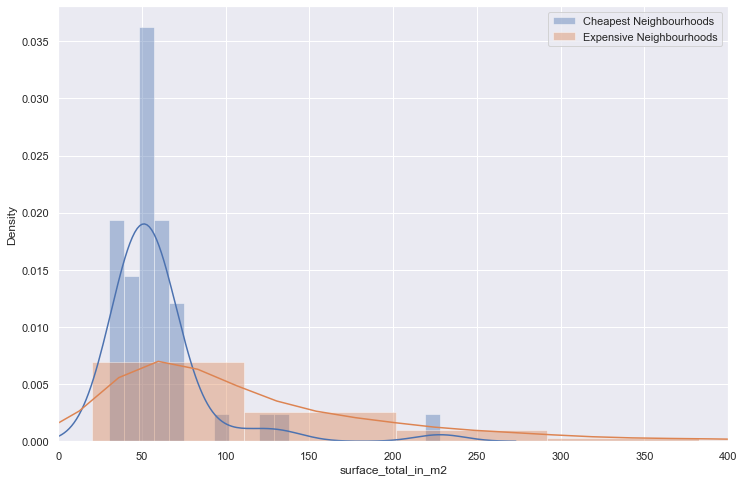

In [49]:
g = sns.distplot(a[a.barrio.isin(cheapest)].surface_total_in_m2, label="Cheapest Neighbourhoods")
sns.distplot(a[a.barrio.isin(most_expensive)].surface_total_in_m2, label="Expensive Neighbourhoods")
g.set_xlim(0, 400)
plt.legend()

C:\Users\61476\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\61476\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


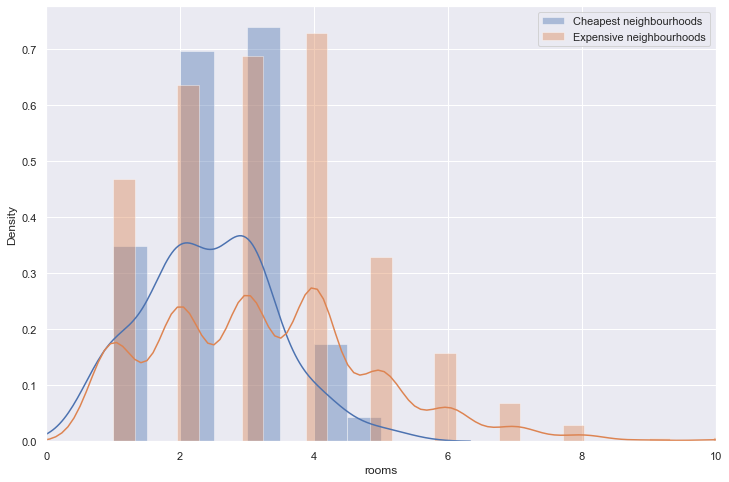

In [51]:
g = sns.distplot(a[a.barrio.isin(cheapest)].rooms, label="Cheapest neighbourhoods")
sns.distplot(a[a.barrio.isin(most_expensive)].rooms, label="Expensive neighbourhoods")
g.set_xlim(0, 10)
plt.legend()

C:\Users\61476\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\61476\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


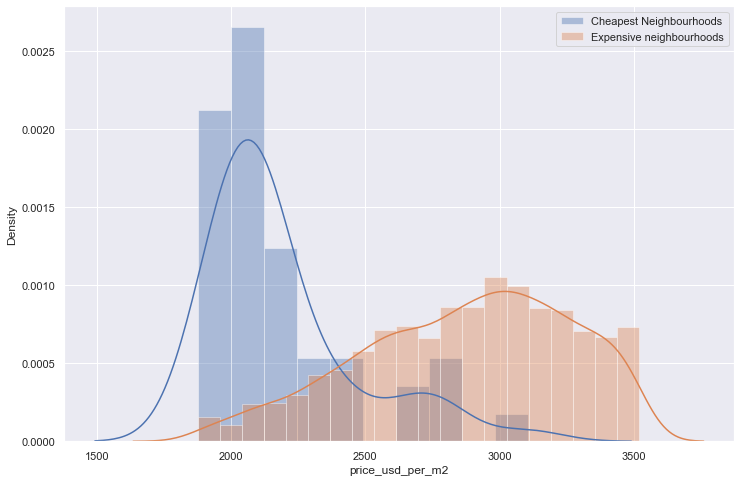

In [53]:
g = sns.distplot(a[a.barrio.isin(cheapest)].price_usd_per_m2, label="Cheapest Neighbourhoods")
sns.distplot(a[a.barrio.isin(most_expensive)].price_usd_per_m2, label="Expensive neighbourhoods")
plt.legend()